<a href="https://colab.research.google.com/github/brendanpshea/data-science/blob/main/Data_Science_1Review.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data Science: A Review of Basic Concepts
### Brendan SHea, PHD

Hello! I am (the completely fictional) Dr. Samuel Endgame, a junior data scientist specializing in epidemiology. Imagine a world where tiny, invisible organisms can affect our lives in profound ways. That's the world of epidemiology, where we study the spread of diseases, how they impact populations, and what we can do to stop them. It's like being a detective, but instead of solving crimes, we solve puzzles about health and illness. We use tools like data analysis and statistical modeling to understand these puzzles. Our work helps keep people safe and healthy, and it's always exciting because we're constantly learning new things about how to fight diseases.

Brendan's Note: This chapter is aligned to the terminology and learning outcomes of the **CompTia Data+ certification**, an entry-level exam for aspiring data scientists. This will allow us to review much of the material we've learned over the course of the semester. I created a fictional "character" to make covering all of the terms a bit more fun (hopefully!).

You'll note here that some of the code examples--mostly in Python, R, or SQL--go siginficantly beyond what we've covered so far in this class. The goal here is NOT to master the particular techniques. Rather, I want you to see what some of the abstract ideas we will talk about "look like" in pratice. (And, if you choose to take the exam, it's good to be able to "read" code and be able to explain roughly what is happening).


## How Does Data Science Aid in Predicting Disease Outbreaks?

In the realm of epidemiology, data science serves as a powerful ally, particularly in predicting disease outbreaks. This process involves analyzing large datasets to identify patterns and trends that could indicate an impending outbreak. The key concepts here include data mining, statistical modeling, and predictive analytics.

**Data mining** refers to the process of exploring large datasets to uncover meaningful patterns and insights. In the context of disease outbreaks, this could involve identifying clusters of illness or changes in the rate of disease occurrence.

**Statistical modeling** involves creating mathematical models to represent the real-world processes behind the data. In epidemiology, such models can simulate how diseases spread through populations, considering various factors like transmission rates and population density.

**Predictive analytics** is the use of statistical models to make predictions about future events. In disease outbreak prediction, these analytics can forecast the likelihood of an outbreak occurring, its potential severity, and which populations may be most affected.

### Example: Predicting Flu Outbreaks

Let's consider a practical example using Python. Suppose we're trying to predict a flu outbreak. We might start by collecting data on flu cases from previous years, along with relevant variables like weather conditions, population density, and vaccination rates. Our goal is to build a model that can predict the number of flu cases based on these variables.

First, we'd perform data preprocessing to clean and organize our data. This step is crucial for ensuring the quality and accuracy of our analysis.

```python
import pandas as pd

# Load the dataset
flu_data = pd.read_csv('flu_data.csv')

# Preprocessing steps
flu_data.dropna(inplace=True)  # Removing missing values
flu_data['date'] = pd.to_datetime(flu_data['date'])  
# Converting dates to datetime objects
```

Next, we'd explore the data to understand patterns and correlations. This might involve generating plots or calculating statistics.

```python
import seaborn as sns
import matplotlib.pyplot as plt

# Visualizing the number of flu cases over time
plt.figure(figsize=(12,6))
sns.lineplot(x='date', y='flu_cases', data=flu_data)
plt.title('Flu Cases Over Time')
plt.show()
```

Finally, we'd build a predictive model. A common choice for this kind of time-series data is a seasonal ARIMA (AutoRegressive Integrated Moving Average) model, which can handle seasonality in data, like the annual flu season.

```python
from statsmodels.tsa.arima.model import ARIMA

# Building the ARIMA model
model = ARIMA(flu_data['flu_cases'], order=(1, 1, 1), seasonal_order=(1, 1, 1, 12))
results = model.fit()

# Predicting flu cases for the next 12 months
predictions = results.forecast(steps=12)
```

This example illustrates how data science techniques enable us to anticipate and prepare for potential health crises, ultimately contributing to more effective public health interventions.

## How Do Various Database Structures and Schemas Support Epidemiological Data Analysis?

In epidemiology, the effective management and analysis of data are crucial. This requires understanding different types of databases and schema concepts. Let's dive into these concepts and explore how they are utilized in epidemiological research.

**Relational databases** are structured to recognize relationships among stored items of information. They use a table format, where each row is a record with a unique identifier (like a patient ID), and each column is a specific attribute (like age, sex, diagnosis). This structure is excellent for maintaining data accuracy and consistency.

**Non-relational databases**, or NoSQL databases, are more flexible in terms of the data they can store and how they store it. They are ideal for unstructured data, like text or multimedia, and can handle large volumes of data efficiently, which is often the case in epidemiological studies.

**Data marts, data warehousing, and data lakes** are concepts used to store and manage large amounts of data. A data mart is a subset of a data warehouse, focused on a specific area (like a specific disease). A data warehouse is a centralized repository for all data collected by an organization, while a data lake stores raw data in its native format.

**Online Transactional Processing (OLTP)** and **Online Analytical Processing (OLAP)** represent two types of data processing. OLTP is used for managing transaction data, like patient records in a hospital. OLAP is used for complex queries and analysis, like identifying trends in disease spread across a population.

Schema concepts like **Snowflake** and **Star schemas** organize data in a warehouse. The Star schema has a central fact table (like "patient visits") linked to dimension tables (like "time", "patient", "disease"). The Snowflake schema is a more complex version where dimension tables are normalized.

Slowly changing dimensions are an approach to managing historical data in databases. They allow for keeping either the most current information or both historical and current information. This is particularly important in epidemiology for tracking the progression and changes in disease patterns over time.

### Example: Tracking Disease Spread with Relational Databases

In my role, I often use relational databases to track and analyze the spread of diseases. Let's consider a simple example using Python and SQLite, a lightweight relational database.

Suppose we have two tables: `Patients` and `Disease_Cases`. `Patients` contains basic patient information, and `Disease_Cases` tracks individual instances of disease cases.

This structure allows us to perform complex queries to understand the spread of a particular disease, identify high-risk groups, or evaluate the effectiveness of interventions.

In [1]:
# First, we create a database and connect to it
%load_ext sql
%sql sqlite:///medical_data.db

In [2]:
%%sql
--A script to create two tables
CREATE TABLE Patients(
  PatientID INT PRIMARY KEY,
  Name VARCHAR(40) NOT NULL,
  Age INT NOT NULL,
  Sex CHAR(3) NOT NULL);

CREATE TABLE Disease_Cases(
  CaseID INT PRIMARY KEY,
  PatientID INT NOT NULL,
  Blood_Pressure INT NOT NULL,
  Disease VARCHAR(255) NOT NULL,
  Date_Reported DATE NOT NULL,
  FOREIGN KEY (PatientID) REFERENCES Patients (PatientID))

 * sqlite:///medical_data.db
Done.
Done.


[]

## What Are the Characteristics of Different Data Structures and File Formats in Epidemiology, and How Are They Structured?"

In epidemiology, the structure of data and the format in which it is stored significantly impact how it is processed and analyzed. **Structured Data** is highly organized and easy to manipulate, comprising defined rows and columns in databases or spreadsheets and key-value pairs in formats like JSON. By contrast, **unstructured data** lacks a predefined format, making it more complex to process. It encompasses undefined fields and diverse forms such as text, images, or machine data like logs.

### Data File Formats and Their Structures:

#### Text/Flat Files

**Tab Delimited:** Each data field is separated by a tab.

```
PatientID	Name	Age	Diagnosis
C001	Beth Emhoff	33	Meningoencephalitis
C002	Mitch Emhoff	40	Immune
```

**Comma Delimited (CSV):** Data fields are separated by commas.

```
PatientID,Name,Age,Diagnosis
Z001,Gerry Lane,40,Healthy
Z002,Karin Lane,38,Healthy
```

#### JavaScript Object Notation (JSON):
JSON structures data in a format that is both human-readable and machine-readable.

```javascript
{
        "patients": [
            {
                "PatientID": "L001",
                "Name": "Robert Neville",
                "Age": 42,
                "Diagnosis": "Immune"
            },
            {
                "PatientID": "L002",
                "Name": "Anna Montez",
                "Age": 28,
                "Diagnosis": "Healthy"
            }
        ]
}
```

#### Extensible Markup Language (XML)
XML uses tags to define elements and structure data hierarchically.
```xml
<patients>
        <patient>
            <PatientID>D001</PatientID>
            <Name>Jim</Name>
            <Age>29</Age>
            <Diagnosis>Healthy</Diagnosis>
        </patient>
        <patient>
            <PatientID>D002</PatientID>
            <Name>Selena</Name>
            <Age>26</Age>
            <Diagnosis>Healthy</Diagnosis>
        </patient>
</patients>
```

#### Hypertext Markup Language (HTML)
HTML uses tags to structure content for web pages. While not typically used for data storage in epidemiology, it's essential for presenting findings, and is often a source for data to be "scraped" from the web.

```html
<html>
        <body>
            <h1>Project Wildfire Epidemiology Data</h1>
            <table>
                <tr>
                    <th>PatientID</th>
                    <th>Name</th>
                    <th>Age</th>
                    <th>Diagnosis</th>
                </tr>
                <tr>
                    <td>W001</td>
                    <td>Dr. Stone</td>
                    <td>45</td>
                    <td>Researcher</td>
                </tr>
                <!-- More rows... -->
            </table>
        </body>
    </html>
```

## How Do Integration and Data Collection Methods Facilitate Comprehensive Epidemiological Analysis?

In epidemiology, integrating data from various sources and collecting data through multiple methods are crucial for comprehensive analysis. Understanding these processes is key to generating reliable and insightful epidemiological data.

- **Extract, Transform, Load (ETL)** is a process where data is extracted from various sources, transformed into a consistent format, and then loaded into a storage system. This is particularly useful when dealing with data from multiple healthcare systems or studies.

- **Extract, Load, Transform (ELT)** is similar to ETL, but the order of operations is different. Data is first extracted and loaded into a data warehouse, and then transformed as needed. This approach is becoming more popular with the advent of cloud computing, as it allows for greater flexibility in data processing.

- **Delta Load** refers to the process of only loading the changes (or deltas) in data since the last load. This is efficient in ongoing studies where data is continuously updated, such as tracking the spread of a disease over time.

- **Application Programming Interfaces (APIs)** allow for the automated retrieval of data from external sources, such as public health databases or research databases. They are crucial for real-time data integration in epidemiological studies.

### Data Collection Methods

- **Web Scraping** involves programmatically extracting data from websites. It's useful for gathering epidemiological data from online sources, such as news reports on disease outbreaks.
- Many epidemiological studies rely on data from **public databases**, such as the WHO or CDC, which provide extensive datasets on various health indicators and disease outbreaks.
- As mentioned, APIs provide a way to automatically collect data from various online services, which is essential for real-time monitoring and analysis in epidemiology.
- **Surveys** are a primary method for collecting epidemiological data directly from individuals, including information on health status, risk factors, and lifestyle.
- **Sampling** involves selecting a subset of a population for study. It's a fundamental method in epidemiology to make inferences about a larger population.
- Direct **observation** is used in field studies to collect data on health behaviors, environmental conditions, and disease symptoms.

### Example: Data Integration Using Python

Let's consider an example of data integration using Python, where we combine data from a public database and an API.

Extracting Data from a Public Database (CSV File):

```python
import pandas as pd

# Reading epidemiological data from a CSV file
public_data = pd.read_csv('public_health_data.csv')
print(public_data.head())

```

Retrieving Data from an API:

```python
import requests
import json

# Making a request to a public health API
response = requests.get('https://api.publichealth.org/diseases')
api_data = response.json()

# Converting API data to a DataFrame
api_df = pd.DataFrame(api_data['diseases'])
print(api_df.head())
```

In this example, we extract data from a CSV file and an API, demonstrating how diverse data sources can be integrated for comprehensive epidemiological analysis.

## Why is Data Cleaning Essential in Epidemiological Studies, and What Issues Does it Address?

In epidemiology, **data cleaning** is a critical step to ensure the accuracy and reliability of research findings. It addresses several issues that can skew results or mislead conclusions. Reasons for cleaning data include:

- **Duplicate Data** (repeated entries) can lead to overrepresentation of certain data points, affecting statistical analyses and outcomes.
- Similar to duplicates, **redundant data** includes information that is repeated in different formats. It can complicate analysis and storage, leading to inefficiency.
- Epidemiological datasets often have **missing values**, which can bias results if not handled properly. Methods to address this include data imputation or removal of incomplete records.
- **Invalid data** are entries that do not conform to the expected format or range (e.g., a negative age). Identifying and correcting these anomalies is crucial for maintaining the integrity of the dataset.
- **Non-parametric Data** does not fit a normal distribution, which can affect certain types of statistical analyses. Identifying and transforming non-parametric data can be essential for appropriate analysis.
- **Outliers** are data points that deviate significantly from the majority of data. While sometimes these are valid and reveal important findings, they can also result from errors and need to be examined.
- **Specification Mismatch** occurs when data collected from different sources do not follow the same specifications or standards, leading to inconsistencies.
- **Data Type Validation** involves ensuring that each data field conforms to its expected data type (e.g., numeric, date, text) is important for accurate processing and analysis.

### Example: Data Cleaning in R (on Swiss Fertility Data)

Consider an example of data cleaning in R, a commonly used language in epidemiology. We'll address issues like missing values, duplicate data, and outliers.

In this R script (which we are going to run "inside" Python using the rpy2 library), we first remove duplicates and handle missing values. Then, we identify and remove outliers based on a specific criterion (e.g., the 99th percentile of age). This ensures our dataset is more accurate and representative for subsequent analysis.

           Fertility Agriculture Examination Education Catholic
Courtelary      80.2        17.0          15        12     9.96
Delemont        83.1        45.1           6         9    84.84
Moutier         85.8        36.5          12         7    33.77
Neuveville      76.9        43.5          17        15     5.16
Porrentruy      76.1        35.3           9         7    90.57
Broye           83.8        70.2          16         7    92.85
           Infant.Mortality
Courtelary             22.2
Delemont               22.2
Moutier                20.3
Neuveville             20.6
Porrentruy             26.6
Broye                  23.6


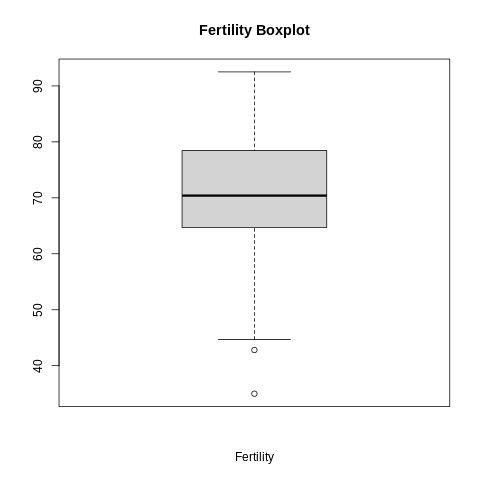

In [12]:
import rpy2.robjects as robjects
from rpy2.robjects import pandas2ri
from IPython.display import Image

# Enable automatic conversion between Pandas dataframes and R data frames
pandas2ri.activate()

# Writing the R script as a multi-line string
r_script = '''
library(tidyverse)

# Load the swiss dataset
data(swiss)
data <- swiss

# Removing duplicates (though swiss dataset likely has none)
data <- distinct(data)

# Handling missing values - swiss doesn't have NA, but included for completeness
clean_data <- na.omit(data)

# Identifying and handling outliers
# Save the boxplot as an image
png(file = "boxplot.png")
boxplot(swiss$Fertility, main="Fertility Boxplot", xlab="Fertility")
dev.off()

# Removing outliers
fertility_limit <- quantile(swiss$Fertility, 0.99)
clean_data <- subset(swiss, Fertility <= fertility_limit)

# Print the cleaned data
print(head(clean_data))
'''

# Execute the R script
robjects.r(r_script)

# Display the saved boxplot image
Image(filename='boxplot.png')


## How Do Data Transformation Techniques Enhance the Quality and Usability of Epidemiological Data?

In the field of epidemiology, transforming data effectively is crucial for accurate analysis and interpretation. Several techniques are employed to ensure that data is in the appropriate format and accurately represents the information needed.

**Recoding Data** is a fundamental transformation technique. **Numeric recoding** involves changing values into a different numeric scale or format, which is vital for standardizing measurements across different datasets. For example, converting temperatures from Fahrenheit to Celsius to maintain consistency. **Categorical recoding** involves converting categorical data into numeric codes or vice versa. This is often necessary for statistical modeling, such as coding 'Male' and 'Female' as 1 and 0, respectively.

Another important technique is the creation of **Derived Variables**, which are new variables created from one or more existing variables. A common example in epidemiology is calculating the Body Mass Index (BMI) from height and weight measurements. This helps in simplifying and focusing analyses on relevant health indicators.

- **Merging** is the process of combining two or more datasets based on a common variable. For instance, merging patient demographics with their medical records can provide a more comprehensive view of the patient's health status.

- **Data Blending** is similar to merging but is used when datasets do not have a common structure or key. It involves combining data from different sources to create a comprehensive dataset, which is particularly useful in large-scale epidemiological studies that gather data from various sources.

- **Concatenation** is a technique that joins two or more strings of data end-to-end. This is often used in string manipulation, such as combining first and last names into a full name.

- **Appending** new data to the end of an existing dataset is a common practice, especially when adding new records to an ongoing study. This ensures that the dataset remains up-to-date and comprehensive.

- **Imputation** refers to the process of replacing missing data with substituted values. This can be based on statistical methods like the mean or median of the existing data. Imputation is crucial for maintaining the integrity of the dataset, especially when dealing with incomplete data.

- **Reduction/Aggregation** is about summarizing or aggregating detailed data into a more digestible and useful form. For example, calculating the average age or the prevalence rate of a disease in a study population. This makes the data more accessible for interpretation and decision-making.

- **Transposing** data involves flipping the dataset, turning columns into rows and vice versa. This can be particularly useful for data visualization or different types of analysis where the orientation of the data matters.

- **Normalization** adjusts the scale of data without distorting the differences in the ranges of values. This is often necessary in preparing data for machine learning models, as it ensures that all variables contribute equally to the analysis.

- Finally, **Parsing/String Manipulation** involves extracting specific data from a string or converting data into a more usable format. This is essential in cleaning and preparing textual data for analysis, such as extracting specific information from clinical notes.

These data transformation techniques play a critical role in refining raw data into an analyzable format, ensuring the accuracy and reliability of epidemiological studies.


### Example: Data Transformation in Python

Let's go through an example using Python to demonstrate several of these data transformation techniques.

This Python script demonstrates recoding categorical data, creating derived variables, merging datasets, and normalizing a variable. Each step is crucial in preparing the data for accurate and insightful epidemiological analysis.

In [ ]:
# Recoding Categorical Data and Derived Variables:
import pandas as pd

# Sample dataset
df = pd.DataFrame({
    'Gender': ['Male', 'Female', 'Female'],
    'Height_cm': [180, 165, 170],
    'Weight_kg': [80, 60, 65]
})

# Recoding Gender
df['Gender_Code'] = df['Gender'].map({'Male': 1, 'Female': 0})

# Creating a Derived Variable - BMI
df['BMI'] = df['Weight_kg'] / (df['Height_cm']/100) ** 2

# Data Merge and Normalization:
from sklearn.preprocessing import MinMaxScaler

# Another dataset for merging
medical_data = pd.DataFrame({
    'Patient_ID': [1, 2, 3],
    'Blood_Pressure': [120, 110, 115]
})

# Merging datasets
merged_data = pd.merge(df, medical_data, left_index=True, right_index=True)

# Normalizing Blood Pressure
scaler = MinMaxScaler()
merged_data['Normalized_BP'] = scaler.fit_transform(merged_data[['Blood_Pressure']])

merged_data

,Gender,Height_cm,Weight_kg,Gender_Code,BMI,Patient_ID,Blood_Pressure,Normalized_BP
0,Male,180,80,1,24.691358,1,120,1.0
1,Female,165,60,0,22.038567,2,110,0.0
2,Female,170,65,0,22.491349,3,115,0.5


## In What Ways Do Data Manipulation and Query Optimization Techniques Improve Efficiency and Insight in Epidemiological Data Analysis?

Epidemiological research involves large and complex datasets. Efficient **data manipulation** and **query optimization techniques** are essential for extracting meaningful insights without excessive computational resources.

**Filtering** involves selecting a subset of data based on certain criteria. It's crucial for focusing on relevant data, like selecting records of a particular disease. **Sorting** arranges data in a specific order (ascending or descending) based on one or more columns, aiding in understanding trends and patterns. **Date functions** work with date and time data, vital for allowing analysis over specific time periods or intervals. **Logical functions** (e.g., AND, OR, NOT) combine multiple conditions in data filtering or transformation. **Aggregate functions**, like SUM, AVG, MAX, and MIN, compute single values from groups of data and are essential in summarizing epidemiological data. **System functions** provide information about the database system, useful for managing and optimizing data.

**Query optimization techniques** include **parametrization**, using parameters in queries instead of hard-coded values to improve performance and security. **Indexing** creates indexes on tables to significantly speed up query execution, especially in large datasets. Utilizing **temporary tables in query sets** improves the efficiency of complex queries by breaking them down into simpler steps. Querying only a **subset of records**, rather than the entire dataset, reduces the load on the system and speeds up the response time. Analyzing the **execution plan** of a query helps in understanding how a query is processed and in identifying potential areas for optimization.



### Example: Data Manipulation and Query Optimization in SQL

Here's an example using SQL, a common language for database management in epidemiology, demonstrating data manipulation and query optimization.


In this SQL script, we perform data manipulation to filter and summarize data, and then use indexing to optimize a query. These techniques enhance the efficiency and speed of data analysis in epidemiological research.

In [3]:
%%sql
-- Creating an index on the 'Disease' column in the Disease_Cases table for faster query execution
CREATE INDEX idx_disease
ON Disease_Cases (Disease);

-- Running an optimized query to fetch recent cases of Influenza
-- Utilizing indexing to improve performance
SELECT P.Name, P.Age, DC.Date_Reported
FROM Patients P
JOIN Disease_Cases DC ON P.PatientID = DC.PatientID
WHERE DC.Disease = 'Influenza'
ORDER BY DC.Date_Reported DESC;

-- Using a temporary table to store intermediate results for complex queries
CREATE TEMPORARY TABLE TempRecentCases AS
SELECT PatientID, MAX(Date_Reported) AS Recent_Report_Date
FROM Disease_Cases
GROUP BY PatientID;

-- Joining the temporary table with the Patients table to get detailed information
SELECT P.Name, P.Age, TRC.Recent_Report_Date
FROM Patients P
JOIN TempRecentCases TRC ON P.PatientID = TRC.PatientID;


 * sqlite:///medical_data.db
Done.
Done.
Done.
Done.


Name,Age,Recent_Report_Date


## How Do Descriptive Statistics Methods Enhance the Understanding of Epidemiological Data?"

In the field of epidemiology, descriptive statistics are essential for summarizing and understanding the characteristics of health-related data. These methods provide insights into the central tendency and variability of data, as well as the frequency and distribution of health events.

**Measures of Central Tendency** include the **mean**, **median**, and **mode**.
- The mean provides the average value, useful in understanding the overall trend of data points.
- The median, being the middle value, offers an understanding of the central point of a dataset, especially useful when the data is skewed.
- The mode, the most frequently occurring value, can indicate the most common condition or characteristic in a dataset.

**Measures of Dispersion** such as the **range** (difference between the max and min values), **distribution** (how values are spread across the dataset), **variance**, and **standard deviation** are crucial for understanding the spread and variability of data. These measures help in understanding the reliability and precision of the mean.

**Frequencies and Percentages** are used to describe how often certain values or categories occur in the dataset. **Percent change** and **percent difference** are particularly useful in epidemiology for understanding the change in disease prevalence or the effectiveness of treatments over time. **Confidence intervals** provide a range within which the true value of a statistic is likely to fall, offering insights into the precision of estimates.


### Example: Descriptive Statistics in Python

Here's a brief example using Python to demonstrate some of these descriptive statistics methods. Suppose we have a dataset of patient ages and blood pressure readings.

In [4]:
import pandas as pd

# Sample dataset
data = {'Age': [25, 30, 35, 40, 45, 50],
        'Blood_Pressure': [120, 125, 130, 135, 140, 145]}

df = pd.DataFrame(data)

# Calculating Measures of Central Tendency
mean_age = df['Age'].mean()
median_age = df['Age'].median()
mode_bp = df['Blood_Pressure'].mode()[0]

# Calculating Measures of Dispersion
range_bp = df['Blood_Pressure'].max() - df['Blood_Pressure'].min()
std_dev_bp = df['Blood_Pressure'].std()

# Outputting the results
print(f"Mean Age: {mean_age}, Median Age: {median_age}, Mode of Blood Pressure: {mode_bp}")
print(f"Range of Blood Pressure: {range_bp}, Standard Deviation of Blood Pressure: {std_dev_bp}")


Mean Age: 37.5, Median Age: 37.5, Mode of Blood Pressure: 120
Range of Blood Pressure: 25, Standard Deviation of Blood Pressure: 9.354143466934854


### Implementing Statistical Tests and Models in Epidemiological Research

**"How Do Statistical Tests and Models Contribute to Hypothesis Testing and Data Interpretation in Epidemiology?"**

In epidemiology, statistical tests and models play a crucial role in hypothesis testing and interpreting data. These methods allow researchers to determine the significance of their findings and understand the relationships between different variables.

**T-tests** are used to compare the means of two groups, helping to determine if there is a statistically significant difference between them. The **Z-score** is a measure of how many standard deviations an element is from the mean, useful for identifying outliers. **P-values** help determine the significance of the results; a low p-value (< 0.05) often indicates that the findings are statistically significant.

The **Chi-squared test** is commonly used to test relationships between categorical variables. It helps to determine whether there is a significant association between two variables.

In **hypothesis testing**, understanding the concepts of **Type I error** (false positive) and **Type II error** (false negative) is crucial. A Type I error occurs when a true null hypothesis is incorrectly rejected, while a Type II error happens when a false null hypothesis is not rejected.

**Simple linear regression** is a method used to understand the relationship between two continuous variables. It models the linear relationship between a dependent variable and one independent variable.


### Example: Analyzing AIDs data in R
THe following R script analyzes data about patients diagnosed with AIDs.

In [18]:
import rpy2.robjects as robjects

# Embedding R code in Python using rpy2
r_code = """
library(MASS)

# Using the 'Aids2' dataset from the MASS package
data(Aids2)

# Summarizing the dataset
summary_Aids2 <- summary(Aids2)

# T-test on age
t_test_result <- t.test(Aids2$age)

# Chi-Squared Test for association between state and status
table_state_status <- table(Aids2$state, Aids2$status)
chi_squared_result <- chisq.test(table_state_status)

# Simple Linear Regression on age and year of diagnosis
regression_model <- lm(diag ~ age, data = Aids2)

# Correlation between age and year of diagnosis
correlation_coefficient <- cor(Aids2$age, Aids2$diag)

# Outputting results
print(
list(summary_Aids2 = summary_Aids2,
     t_test_result = t_test_result,
     chi_squared_result = chi_squared_result,
     regression_model_summary = summary(regression_model),
     correlation_coefficient = correlation_coefficient)
)
"""

# Running the embedded R code
results = robjects.r(r_code)
results


$summary_Aids2
   state      sex           diag           death       status      T.categ    
 NSW  :1780   F:  89   Min.   : 8302   Min.   : 8469   A:1082   hs     :2465  
 Other: 249   M:2754   1st Qu.:10163   1st Qu.:10672   D:1761   blood  :  94  
 QLD  : 226            Median :10665   Median :11235            hsid   :  72  
 VIC  : 588            Mean   :10584   Mean   :10990            other  :  70  
                       3rd Qu.:11103   3rd Qu.:11504            id     :  48  
                       Max.   :11503   Max.   :11504            haem   :  46  
                                                                (Other):  48  
      age       
 Min.   : 0.00  
 1st Qu.:30.00  
 Median :37.00  
 Mean   :37.41  
 3rd Qu.:43.00  
 Max.   :82.00  
                

$t_test_result

	One Sample t-test

data:  Aids2$age
t = 198.21, df = 2842, p-value < 2.2e-16
alternative hypothesis: true mean is not equal to 0
95 percent confidence interval:
 37.03901 37.77914
sample estimates:
m

summary_Aids2,[RTYPES.STRSXP]
t_test_result,[RTYPES.VECSXP]
chi_squared_result,[RTYPES.VECSXP]
regression_model_summary,[RTYPES.VECSXP]
correlation_coefficient,[RTYPES.REALSXP]
